# Część techniczna

W naszej analizie wzięliśmy pod uwagę notowania z okresu od **1 czerwca 2010 roku** do **1 stycznia 2015 roku**, czyli do dnia, w którym wg treści zadania mieliśmy przedstawić klientowi naszą rekomendację. Bazowaliśmy na miesięcznych wartościach akcji danych trzech spółek: PZU, PXM oraz ITG. Przedstawiają się one następująco:

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
# konfiguracja
all_filenames = {
    'daily': {
        'pzu': './pzu_01-06-2010_01-01_2015.csv',
        'pxm': './pxm_01-06-2010_01-01_2015.csv',
        'itg': './itg_01-06-2010_01-01_2015.csv'
    },
    'weekly': {
        'pzu': './pzu_01-06-2010_01-01_2015_weekly.csv',
        'pxm': './pxm_01-06-2010_01-01_2015_weekly.csv',
        'itg': './itg_01-06-2010_01-01_2015_weekly.csv'
    },
    'monthly': {
        'pzu': './pzu_01-06-2010_01-01_2015_monthly.csv',
        'pxm': './pxm_01-06-2010_01-01_2015_monthly.csv',
        'itg': './itg_01-06-2010_01-01_2015_monthly.csv'
    }
}

frequency = 'monthly'
filenames = all_filenames[frequency]
phase_col_name = 'Zamkniecie'
date_col_name = 'Data'
date_format = '%Y-%m-%d'
usecols = [date_col_name] + [phase_col_name]
dates = ['2010-06-01', '2012-01-01', '2013-01-01', '2014-01-01']

In [32]:
# wczytywanie danych
dateparse = lambda x: pd.datetime.strptime(x, date_format)

def csv_file_to_df(filename):
    assert(len(filename) > 0)
    df = pd.read_csv(filename, parse_dates=[date_col_name], date_parser=dateparse, usecols=usecols)
    return df.set_index(date_col_name)

In [33]:
data_frames = dict(((name, csv_file_to_df(filename)) for name, filename in filenames.items()))
assert(len(data_frames) == 3)
data_frames

{'itg':             Zamkniecie
 Data                  
 2010-06-30       71.00
 2010-07-30       76.50
 2010-08-31       65.80
 2010-09-30       71.00
 2010-10-29       74.60
 2010-11-30       79.75
 2010-12-31       79.70
 2011-01-31       78.00
 2011-02-28       80.95
 2011-03-31       84.10
 2011-04-29      107.00
 2011-05-31      118.90
 2011-06-30      118.00
 2011-07-29      110.40
 2011-08-31      104.90
 2011-09-30      103.90
 2011-10-31       98.80
 2011-11-30       99.00
 2011-12-30      114.40
 2012-01-31      128.50
 2012-02-29      137.30
 2012-03-30      152.90
 2012-04-30      138.00
 2012-05-31      133.40
 2012-06-29      141.00
 2012-07-31      134.00
 2012-08-31      127.70
 2012-09-28      137.60
 2012-10-31      160.50
 2012-11-30      169.40
 2012-12-31      184.50
 2013-01-31      189.70
 2013-02-28      179.90
 2013-03-29      188.00
 2013-04-30      197.00
 2013-05-31      252.50
 2013-06-28      264.00
 2013-07-31      315.00
 2013-08-30      287.00
 2013-09-

In [34]:
keys = list(data_frames.keys()) + ['bond']

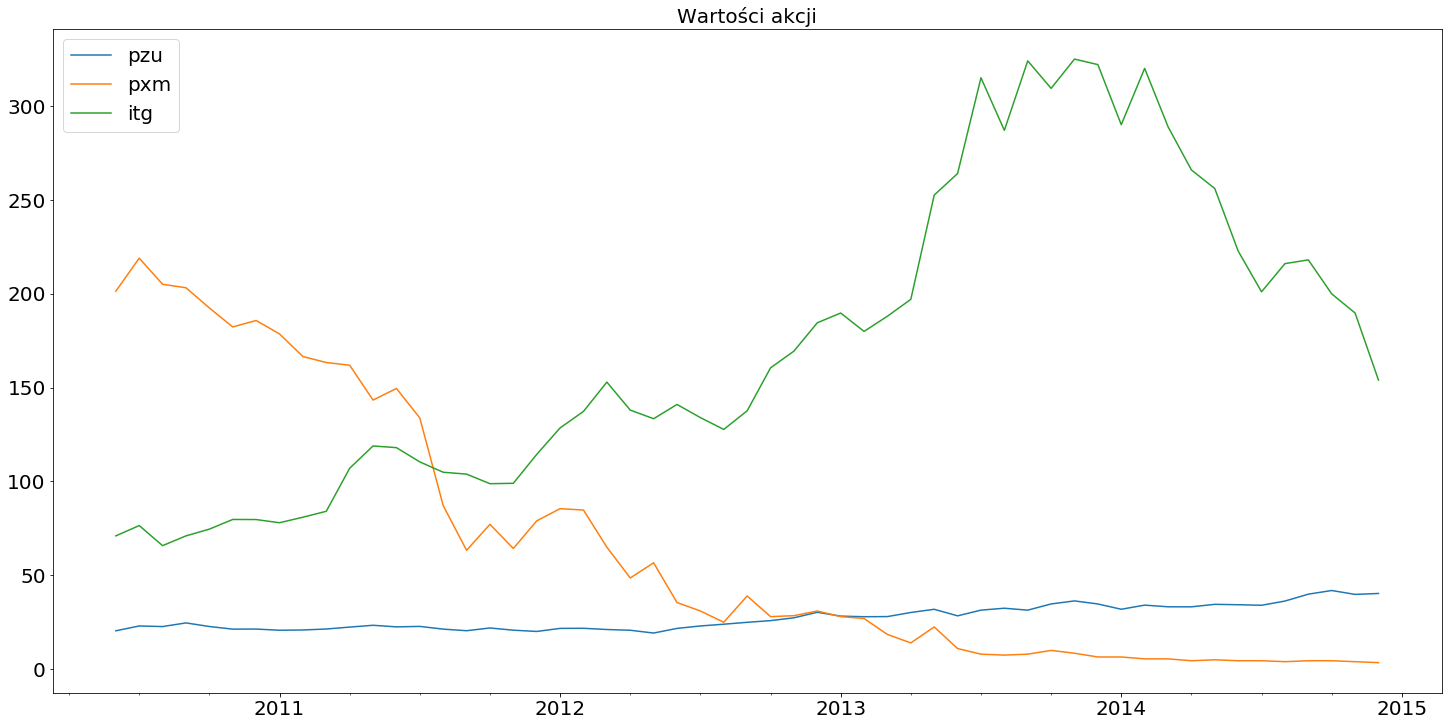

In [35]:
figsize = (20, 10)
kind = 'line'

def plot_data_frames(data_frames):
    for name, df in data_frames.items():
        df[phase_col_name].plot(kind=kind, figsize=figsize, label=name)

    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.title("Wartości akcji", fontsize=20)
    plt.xlabel('')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(loc=2,prop={'size':20})
    plt.show()
    
plot_data_frames(data_frames)

Następnie wyznaczyliśmy miesięczne stopy zwrotu w całym rozpatrywanym okresie:

### Stopy zwrotu

In [36]:
def calculate_return_rates(data_frames):
    return {name: df.pct_change()['Zamkniecie'] for name, df in data_frames.items()}

return_rates = calculate_return_rates(data_frames)

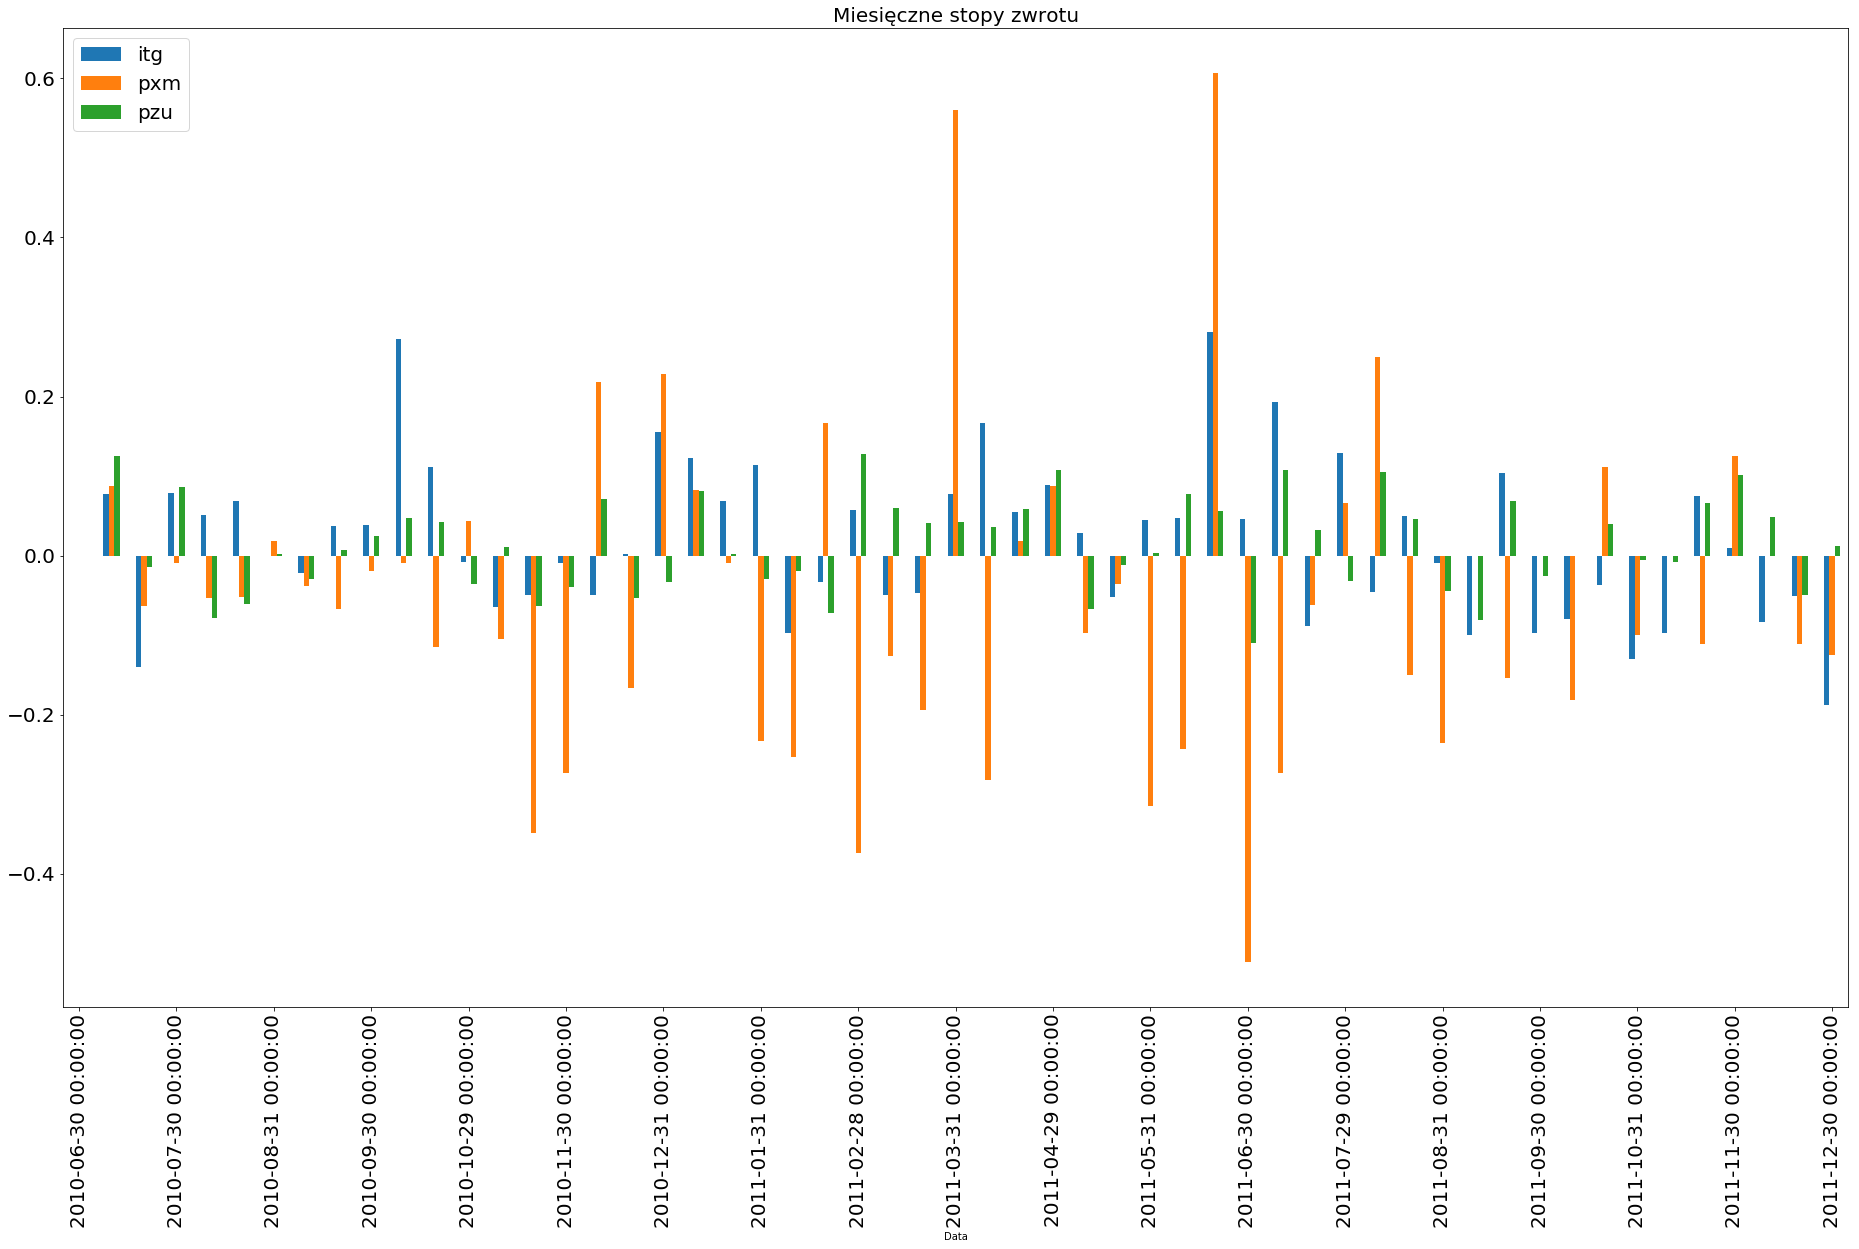

In [37]:
figsize = (32, 18)
kind = 'bar'

def plot_return_rates(return_rates, xticks_freq=3):
    concatenated = pd.concat(return_rates, axis=1)
    concatenated.plot(kind=kind, figsize=figsize)
    plt.title('Miesięczne stopy zwrotu', fontsize=20)
    ax = plt.gca()
    xs = ax.get_xticks()[::xticks_freq]
    ax.set_xticks(xs)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(loc=2,prop={'size':20})
    plt.show()
    
plot_return_rates(return_rates)

...oraz przeanalizowaliśmy miesięczne stopy zwrotu i ich odchylenia standardowe w całym okresie jak również w ciągu ostatniego roku, dwóch i trzech ostatnich lat, tj. w okresach odpowiednio od **2012-01-01**, **2013-01-01** i **2014-01-01** (etykietą "BOND" oznaczyliśmy parametry wybranej przez nas lokaty):

In [38]:
def get_correlation_matrix(data_frames, start_date):
    dfs = {name: {'return': df.pct_change()}  for name, df in data_frames.items()}
    mixed_dfs = pd.concat({name: df['return'].loc[df['return'].index >= start_date] for name, df in dfs.items()}, axis=1)
    return mixed_dfs.corr()

In [97]:
def calculate_monthly_parameters(data_frames, start_date):
    return {
        name: {
            'return': df.pct_change().loc[df.index >= start_date].mean()[0],
            'risk': df.pct_change().loc[df.index >= start_date].std()[0]
        }
        for name, df in data_frames.items()
    }

dates = ['2010-06-01', '2012-01-01', '2013-01-01', '2014-01-01']
parameters_per_date = {date: calculate_monthly_parameters(data_frames, date) for date in dates}
corr_matrices = {date: get_correlation_matrix(data_frames, date) for date in dates}

# dopisujemy dane obligacji
for date in dates:
#    parameters_per_date[date]['bond'] = {'return': 0.02, 'risk': 0.00}
    corr_matrices[date]['bond'] = 0
    corr_matrices[date].loc[-1] = [0.0, 0.0, 0.0, 0.0]
parameters_per_date

{'2010-06-01': {'itg': {'return': 0.018989486352363506,
   'risk': 0.098045542243340653},
  'pxm': {'return': -0.052314073151250834, 'risk': 0.20049041102973145},
  'pzu': {'return': 0.014336054515897791, 'risk': 0.058980005586287104}},
 '2012-01-01': {'itg': {'return': 0.013156047587898003,
   'risk': 0.10145764003399668},
  'pxm': {'return': -0.058362434083913034, 'risk': 0.22559944247130248},
  'pzu': {'return': 0.021246666679347482, 'risk': 0.05959393570960754}},
 '2013-01-01': {'itg': {'return': -0.0020751918770554093,
   'risk': 0.1084192824866633},
  'pxm': {'return': -0.06438104007383734, 'risk': 0.2144155943987465},
  'pzu': {'return': 0.013707893808860144, 'risk': 0.060224235895275015}},
 '2014-01-01': {'itg': {'return': -0.05632024213542728,
   'risk': 0.083482222647407456},
  'pxm': {'return': -0.045564620564620566, 'risk': 0.10004540403945092},
  'pzu': {'return': 0.013798111266412847, 'risk': 0.053073184243911047}}}

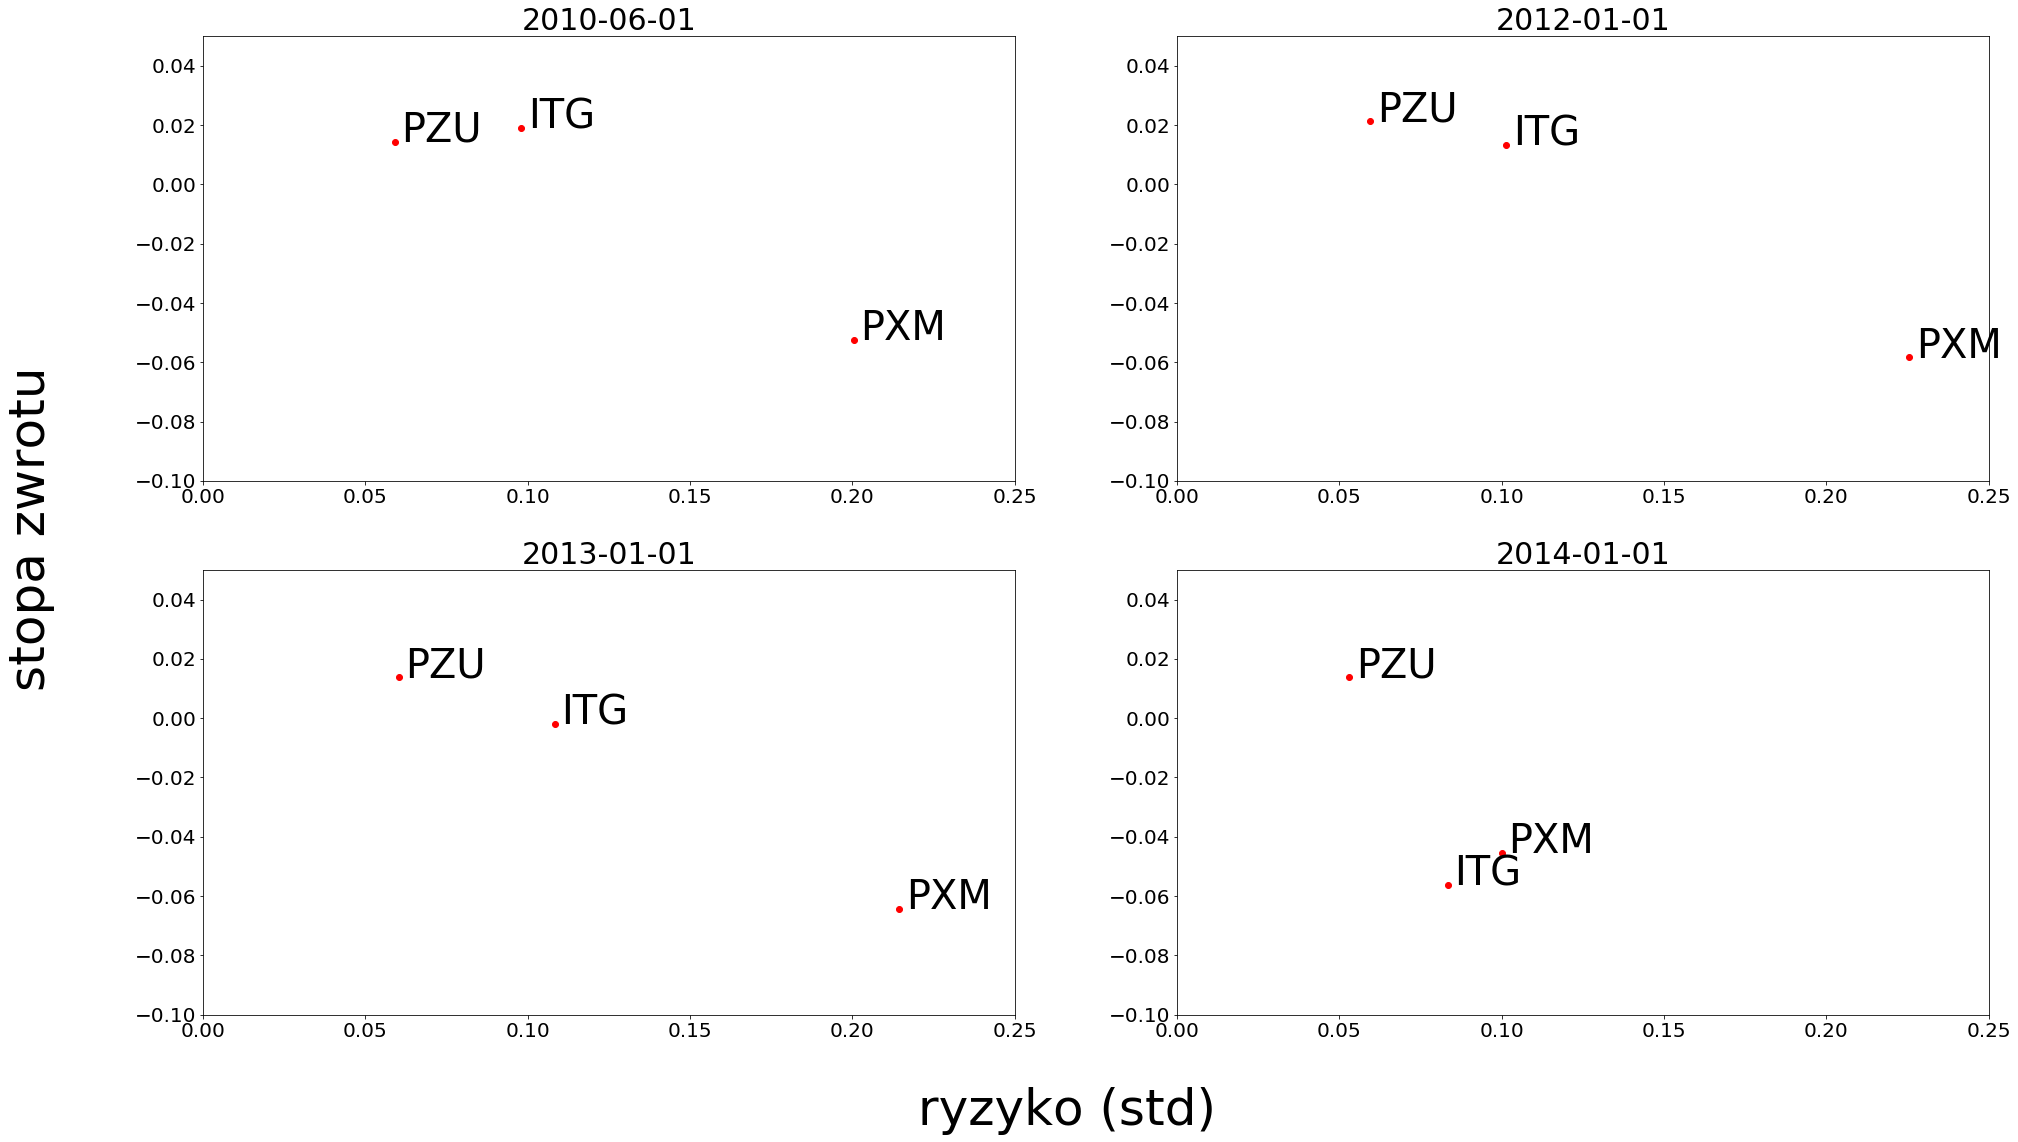

In [98]:
def plot_parameters(parameters_per_date, date):
    assert date in parameters_per_date
    parameters = parameters_per_date[date]
    plt.title(date, fontsize=30)
    plt.xlim(0, 0.25)
    plt.ylim(-0.1, 0.05)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax = plt.gca()
    for name, params in parameters.items():
        assert 'risk' in params
        assert 'return' in params
        plt.plot(params['risk'], params['return'], 'ro')
        ax.annotate(name.upper(), (params['risk'] + 0.002, params['return']), size=40)

        
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=figsize)
for i, date in enumerate(dates):
    plt.subplot(220 + i + 1)
    plot_parameters(parameters_per_date, date)
fig.text(0.04, 0.5, 'stopa zwrotu', va='center', rotation='vertical', fontsize=50)
fig.text(0.5, 0.04, 'ryzyko (std)', ha='center', fontsize=50)
plt.show()

Na podstawie tych danych zdecydowaliśmy, że do wyznaczenia rekomendowanych portfeli wykorzystamy dane z trzech ostatnich lat, z okresu od 1 stycznia 2012 do 1 stycznia 2015 roku. By uzyskać parametry dla okresu rocznego, wyliczoną stopę zwrotu pomnożyliśmy przez $12$, a odchylenie standardowe przez $\sqrt{12}$. Otrzymane parametry:

In [41]:
def calculate_parameters(data_frames, start_date):
    return {
        name: {
            'return': df.pct_change().loc[df.index >= start_date].mean()[0] * 12,
            'risk': df.pct_change().loc[df.index >= start_date].std()[0] * np.sqrt(12)
        }
        for name, df in data_frames.items()
    }

dates = ['2010-06-01', '2012-01-01', '2013-01-01', '2014-01-01']
date = '2012-01-01'
parameters = calculate_parameters(data_frames, date)

# dopisujemy dane obligacji
parameters['bond'] = {'return': 0.02, 'risk': 0.00}
for n, p in parameters.items():
    print("{}: zwrot = {:.2f} ryzyko = {:.2f}".format(n, p['return'], p['risk']))

pzu: zwrot = 0.25 ryzyko = 0.21
pxm: zwrot = -0.70 ryzyko = 0.78
itg: zwrot = 0.16 ryzyko = 0.35
bond: zwrot = 0.02 ryzyko = 0.00


Macierz korelacji:

In [50]:
corr_matrice = get_correlation_matrix(data_frames, date)

corr_matrice['bond'] = 0
corr_matrice.loc[-1] = [0.0, 0.0, 0.0, 0.0]

correlation = corr_matrice.as_matrix()
correlation

array([[ 1.        ,  0.15540191,  0.33299044,  0.        ],
       [ 0.15540191,  1.        ,  0.18920604,  0.        ],
       [ 0.33299044,  0.18920604,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [51]:
def calculate_weighted_params(weights, returns, risks, correlation):
    n = len(weights)
    assert(n > 0)
    weighted_return = np.sum(weights * returns)
    weighted_risk = np.sqrt(np.sum(
            [np.sum([weights[i] * weights[j] * risks[i] * risks[j] * correlation[i, j]
                 for j in range(n)])
         for i in range(n)]))
    return weighted_risk, weighted_return

In [85]:
def calculate_portfolios(returns, risks, correlation, plot_density=10):
    for w1 in np.linspace(-1.00, 1.0, plot_density):
        for w2 in np.linspace(-1.00, 1.00, plot_density):
            for w3 in np.linspace(-1.00, 1.00, plot_density):
                w4 = 1.0 - w1 - w2 - w3
                if np.abs(np.sum([w1, w2, w3, w4]) - 1.0) < 10e-4:
                    weights = np.array([w1, w2, w3, w4])
                    yield (tuple(weights), tuple(calculate_weighted_params(weights, returns, risks, correlation)))

In [86]:
def calculate_portfolios_from_date(date, data_frames, plot_density=10):
    return list(calculate_portfolios(
        np.array([parameters_per_date[date][k]['return'] for k in keys]),
        np.array([parameters_per_date[date][k]['risk'] for k in keys]),
        corr_matrices[date].as_matrix(),
        plot_density))

In [87]:
def split_portfolios(portfolios):
    portfolios_set = set(portfolios)
    best = lambda x: not any([p[1][0] <= x[1][0] and x[1][1] <= p[1][1] for p in portfolios_set - set([x])])
    optimals = set(filter(best, portfolios))
    return (optimals, portfolios_set - optimals)

In [88]:
def plot_portfolios(portfolios, parameters):
    optimals, non_optimals = split_portfolios(portfolios)
    assert len(optimals) > 0
    assert len(non_optimals) > 0
    fig, ax = plt.subplots(figsize=(20, 10))
    for k, v in non_optimals:
        plt.plot(*v, 'ro')
    for k, v in optimals:
        plt.plot(*v, 'go')
    for name, params in parameters.items():
        plt.plot(params['risk'], params['return'], 'bo')
        ax.annotate(name, (params['risk'], params['return']), fontsize=20)

In [89]:
def plot_portfolios_from_date(date, data_frames, plot_density=10):
    returns = np.array([parameters_per_date[date][k]['return'] for k in keys])
    risks = np.array([parameters_per_date[date][k]['risk'] for k in keys])

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_title(date)
    for name, params in parameters_per_date[date].items():
        plt.plot(params['risk'], params['return'], 'ro')
        ax.annotate(name, (params['risk'], params['return']))
    
    portfolios = tuple(calculate_portfolios(returns, risks, corr_matrices[date].as_matrix(), plot_density))
    plot_portfolios(portfolios)

### Efficient frontier bez pozycji krótkich, dla akcji ITG, PXM i PZU

['pzu', 'pxm', 'itg', 'bond']
2012-01-01
30
0.00000 0.00000 0.00000 1.00000 | 0.00000 0.02000
-0.05263 0.05263 -0.05263 1.05263 | 0.04312 -0.03754
0.05263 -0.05263 0.05263 0.94737 | 0.04312 0.07754
0.26316 -0.05263 -0.05263 0.84211 | 0.06253 0.11249
0.36842 -0.05263 0.05263 0.63158 | 0.08658 0.15173
0.57895 -0.05263 -0.05263 0.52632 | 0.11665 0.18669
0.36842 -0.15789 0.05263 0.73684 | 0.13605 0.22756
0.57895 -0.15789 -0.05263 0.63158 | 0.15704 0.26251
0.68421 -0.15789 0.05263 0.42105 | 0.17601 0.30176
0.89474 -0.15789 -0.05263 0.31579 | 0.20295 0.33671
1.00000 -0.15789 0.05263 0.10526 | 0.22792 0.37596
0.78947 -0.26316 0.15789 0.31579 | 0.25144 0.41683
1.00000 -0.26316 0.05263 0.21053 | 0.27049 0.45178
1.00000 -0.26316 0.36842 -0.10526 | 0.31018 0.49532
1.00000 -0.36842 0.05263 0.31579 | 0.32850 0.52761
1.00000 -0.36842 0.36842 0.00000 | 0.35708 0.57115
1.00000 -0.47368 0.05263 0.42105 | 0.39522 0.60343
1.00000 -0.47368 0.36842 0.10526 | 0.41513 0.64697
1.00000 -0.47368 0.68421 -0.2105

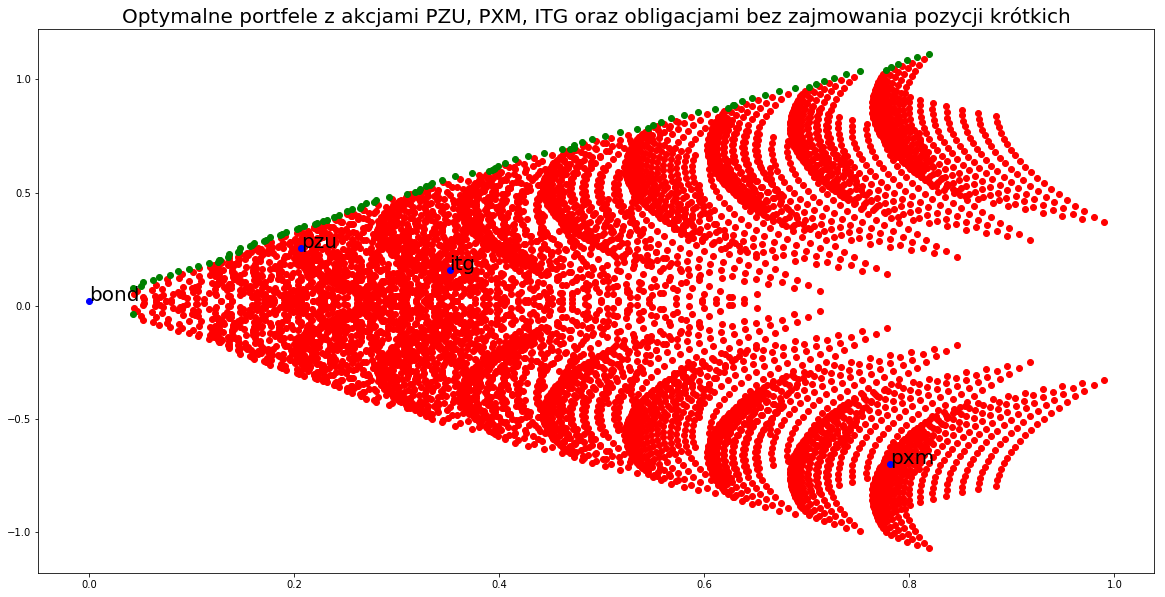

In [95]:
plot_density = 20

def portfolio_cmp(x):
    return (x[1][0], x[1][1])

print(keys)
returns = np.array([parameters[key]['return'] for key in keys])
risks = np.array([parameters[key]['risk'] for key in keys])

portfolios = list(calculate_portfolios(returns, risks, correlation, plot_density))
optimal_portfolios = list(split_portfolios(portfolios)[0])
print(date)
optimal_portfolios.sort(key=portfolio_cmp)
filtered_optimal_portfolios = [((0.0, 0.0, 0.0, 1.0), (0.0, 0.02))]

delta = 0.03
for p in optimal_portfolios:
    risk, ret = p[1]
    d = np.abs(ret - filtered_optimal_portfolios[-1][1][1])
    if d > delta:
        filtered_optimal_portfolios.append(p)
        
print(len(filtered_optimal_portfolios))
for port in filtered_optimal_portfolios:
    fmt_str = '{:.5f}'
    print(' '.join([fmt_str.format(k) for k in port[0]]) + ' | ' + ' '.join([fmt_str.format(k) for k in port[1]]))


for port in optimal_portfolios:
    fmt_str = '{:.5f}'
    print(' '.join([fmt_str.format(k) for k in port[0]]) + ' | ' + ' '.join([fmt_str.format(k) for k in port[1]]))
plot_portfolios(portfolios, parameters)
plt.title('Optymalne portfele z akcjami PZU, PXM, ITG oraz obligacjami bez zajmowania pozycji krótkich', fontsize=20)
plt.show()

# Informacja dla klienta